# The effects of Loan Characterics on Borrower's APR
## by Joshua Alabi



## Investigation Overview


> In this presentation, some visualizations on loans's characterics will be created to study their relationships/coorelations on borrowers's APR. The characters used are BorrowerAPR, ProsperScore, LoanOriginalAmount, StatedMonthlyIncome.



## Dataset Overview

> The Dataset contains 113,917 loans, each row has infomation on the, loan status, loan amount, borrow's APR, borrowers monthly income, etc. This study will be analyzing factors that could influence borrow's APR by looking at some selected characters and how to relate to borrower's ARP.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan  = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Convert ProsperRating into ordered categorical types
color = sb.color_palette()[0]
order_rate = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order_rate)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of BorrowerAPR

> The Observation here is that the lowerest APR is at around 0.0065 and the highested is at around 0.51. Two high counts are found at 0.18 and 0.36.


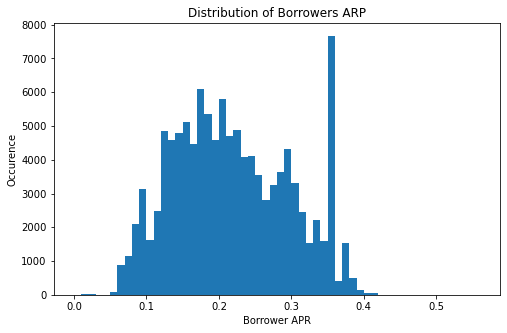

In [4]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('Occurence')
plt.title('Distribution of Borrowers ARP') ;

## Coorelation plot between some columns

> There are no obvious strong positive coorelation between the columns selected. The correlation matrix plots helped to preview all possibles variables related on BorrowerAPR we are analyzing. Out of all variables, ProsperScore has stronger negative coorelation with BorrowerAPR. Borrower APR is also negatively correlated with the loan original amount, which mean that the more the loan amount, the lower the borrowers APR.

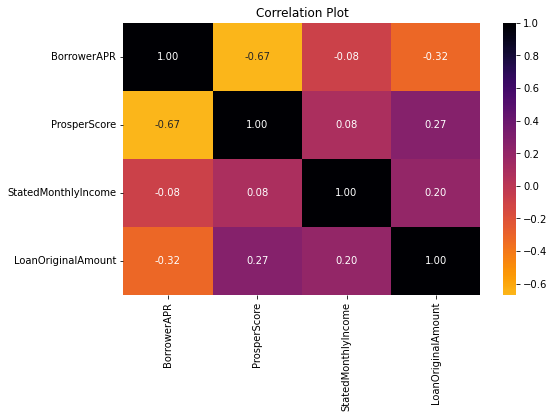

In [5]:
# plot correlation to check relationships

cor_vars = ['BorrowerAPR', 'ProsperScore', 'StatedMonthlyIncome'
            , 'LoanOriginalAmount']

plt.figure(figsize = [8, 5])
sb.heatmap(loan[cor_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'inferno_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

## Effect of Prosper Rating on Borrowers APR and Loan Amount
> The loan amount increases with better rating while borrower APR decreases with better rating. It is also good to note that the relationship between borrower APR and loan amount turns from negative to slightly positive change when the Prosper ratings are increased. This might be as a result of people with A or AA ratings borrowing more money, but people with lower ratings tend to borrow less money, decreasing borrowers APR could encourage them to borrow more. 

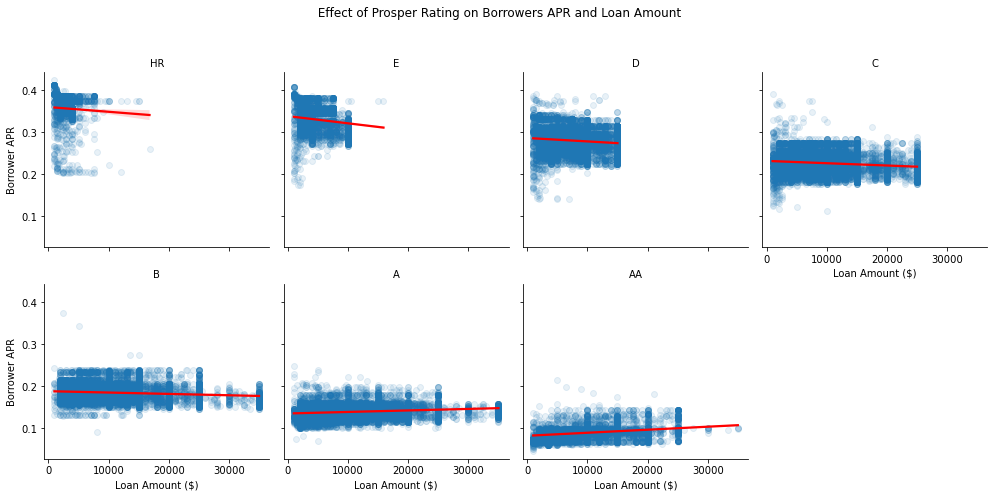

In [6]:
g=sb.FacetGrid(data=loan,col='ProsperRating (Alpha)', height=3.5, col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', line_kws={"color": "red"}, 
      scatter_kws={'alpha':0.1},x_jitter=0.04);
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle(' Effect of Prosper Rating on Borrowers APR and Loan Amount');
plt.subplots_adjust(top=0.85)

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 750694 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
